In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./DATA/fake_reg.csv")

In [7]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


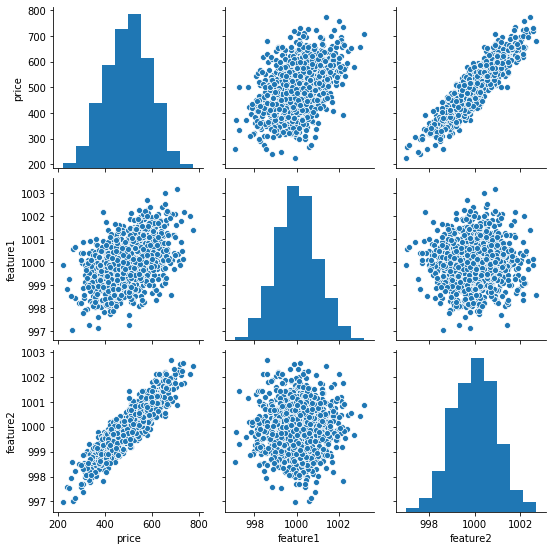

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X = df[['feature1','feature2']].values

In [13]:
y = df['price'].values

In [14]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [19]:
scaler = MinMaxScaler()

In [20]:
predict = scaler.fit(X_train)

In [21]:
X_train = scaler.transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [25]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

In [27]:
model = Sequential([Dense(4,activation='relu'),Dense(2,activation='relu'),Dense(1)])

In [49]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer="rmsprop",
             loss="mse")
model.fit(x=X_train,y=y_train,epochs=300)

Epoch 1/300
22/22 [==============================] - 0s 1ms/step - loss: 258191.4062
Epoch 2/300
22/22 [==============================] - 0s 1ms/step - loss: 258028.4844
Epoch 3/300
22/22 [==============================] - 0s 1ms/step - loss: 257900.6406
Epoch 4/300
22/22 [==============================] - 0s 1ms/step - loss: 257789.9219
Epoch 5/300
22/22 [==============================] - 0s 1ms/step - loss: 257696.6875
Epoch 6/300
22/22 [==============================] - 0s 1ms/step - loss: 257633.6719
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 257599.3125
Epoch 8/300
22/22 [==============================] - 0s 1ms/step - loss: 257575.4219
Epoch 9/300
22/22 [==============================] - 0s 1ms/step - loss: 257553.0469
Epoch 10/300
22/22 [==============================] - 0s 1ms/step - loss: 257531.0781
Epoch 11/300
22/22 [==============================] - 0s 1ms/step - loss: 257509.0938
Epoch 12/300
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 999us/step - loss: 255671.6406
Epoch 96/300
22/22 [==============================] - 0s 1ms/step - loss: 255649.8281
Epoch 97/300
22/22 [==============================] - 0s 1ms/step - loss: 255628.0156
Epoch 98/300
22/22 [==============================] - 0s 999us/step - loss: 255606.2344
Epoch 99/300
22/22 [==============================] - 0s 864us/step - loss: 255584.3438
Epoch 100/300
22/22 [==============================] - 0s 954us/step - loss: 255562.4844
Epoch 101/300
22/22 [==============================] - 0s 999us/step - loss: 255540.7344
Epoch 102/300
22/22 [==============================] - 0s 858us/step - loss: 255518.8594
Epoch 103/300
22/22 [==============================] - 0s 1ms/step - loss: 255497.0312
Epoch 104/300
22/22 [==============================] - 0s 909us/step - loss: 255475.2188
Epoch 105/300
22/22 [==============================] - 0s 909us/step - loss: 255453.3438
Epoch 106/300
22/22 [========================

Epoch 188/300
22/22 [==============================] - 0s 1ms/step - loss: 253645.3438
Epoch 189/300
22/22 [==============================] - 0s 863us/step - loss: 253623.6562
Epoch 190/300
22/22 [==============================] - 0s 909us/step - loss: 253601.9219
Epoch 191/300
22/22 [==============================] - 0s 909us/step - loss: 253580.1094
Epoch 192/300
22/22 [==============================] - 0s 954us/step - loss: 253558.4062
Epoch 193/300
22/22 [==============================] - 0s 818us/step - loss: 253536.6562
Epoch 194/300
22/22 [==============================] - 0s 1ms/step - loss: 253514.9062
Epoch 195/300
22/22 [==============================] - 0s 863us/step - loss: 253493.1875
Epoch 196/300
22/22 [==============================] - 0s 863us/step - loss: 253471.4531
Epoch 197/300
22/22 [==============================] - 0s 954us/step - loss: 253449.7188
Epoch 198/300
22/22 [==============================] - 0s 772us/step - loss: 253428.0156
Epoch 199/300
22/22 [====

22/22 [==============================] - 0s 909us/step - loss: 251649.0469
Epoch 281/300
22/22 [==============================] - 0s 966us/step - loss: 251627.3906
Epoch 282/300
22/22 [==============================] - 0s 864us/step - loss: 251605.7812
Epoch 283/300
22/22 [==============================] - 0s 863us/step - loss: 251584.1094
Epoch 284/300
22/22 [==============================] - 0s 909us/step - loss: 251562.4219
Epoch 285/300
22/22 [==============================] - 0s 818us/step - loss: 251540.7812
Epoch 286/300
22/22 [==============================] - 0s 954us/step - loss: 251519.2500
Epoch 287/300
22/22 [==============================] - 0s 863us/step - loss: 251497.5312
Epoch 288/300
22/22 [==============================] - 0s 818us/step - loss: 251475.8125
Epoch 289/300
22/22 [==============================] - 0s 863us/step - loss: 251454.1250
Epoch 290/300
22/22 [==============================] - 0s 863us/step - loss: 251432.6406
Epoch 291/300
22/22 [==============

In [50]:
loss_df = pd.DataFrame(model.history.history)

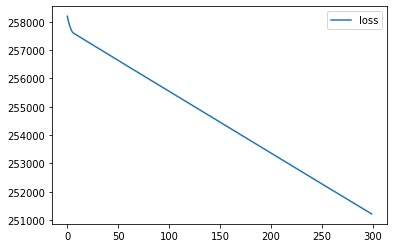

In [51]:
loss_df.plot()

In [52]:
model.evaluate(X_test,y_test,verbose=0)

250247.890625

In [53]:
model.evaluate(X_train,y_train,verbose=0)

251204.703125

In [54]:
test_predictions = model.predict(X_test)

In [55]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [56]:
pred_df = pd.DataFrame(y_test,columns=["Test True Y"])

In [58]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [60]:
pred_df.columns = ["Test True Y","Model Predictions"]

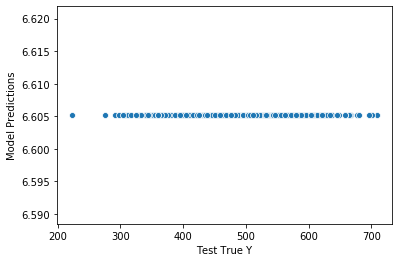

In [61]:
sns.scatterplot(x='Test True Y',y="Model Predictions", data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared